# Eksploracyjna analiza danych

In [12]:
# Import libraries
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# Load the data
with open('../data/processed/exploration_data.pkl', 'rb') as f:
    data = pickle.load(f)

C:\Users\janbi\AppData\Local\Temp\ipykernel_56036\4035796773.py:3: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  data = pickle.load(f)


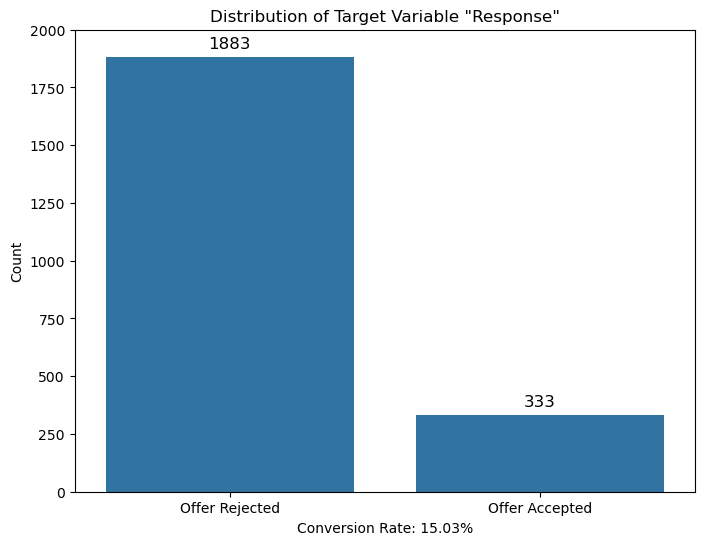

In [3]:
# Get the count of each class in the target variable
response_counts = data['Response'].value_counts()

# Calculate the conversion rate
conversion_rate = (response_counts[1] / response_counts.sum()) * 100

# Plot the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.barplot(x=response_counts.index, y=response_counts.values, legend=False)
plt.title('Distribution of Target Variable "Response"')
plt.xlabel(f"Conversion Rate: {conversion_rate:.2f}%")
plt.ylabel('Count')
plt.ylim(0, 2000)  # Set the y-axis limit
plt.xticks(ticks=[0, 1], labels=['Offer Rejected', 'Offer Accepted'])

# Add data labels
for i, count in enumerate(response_counts):
    plt.text(i, count + 25, str(count), ha='center', va='bottom', fontsize=12)

plt.show()


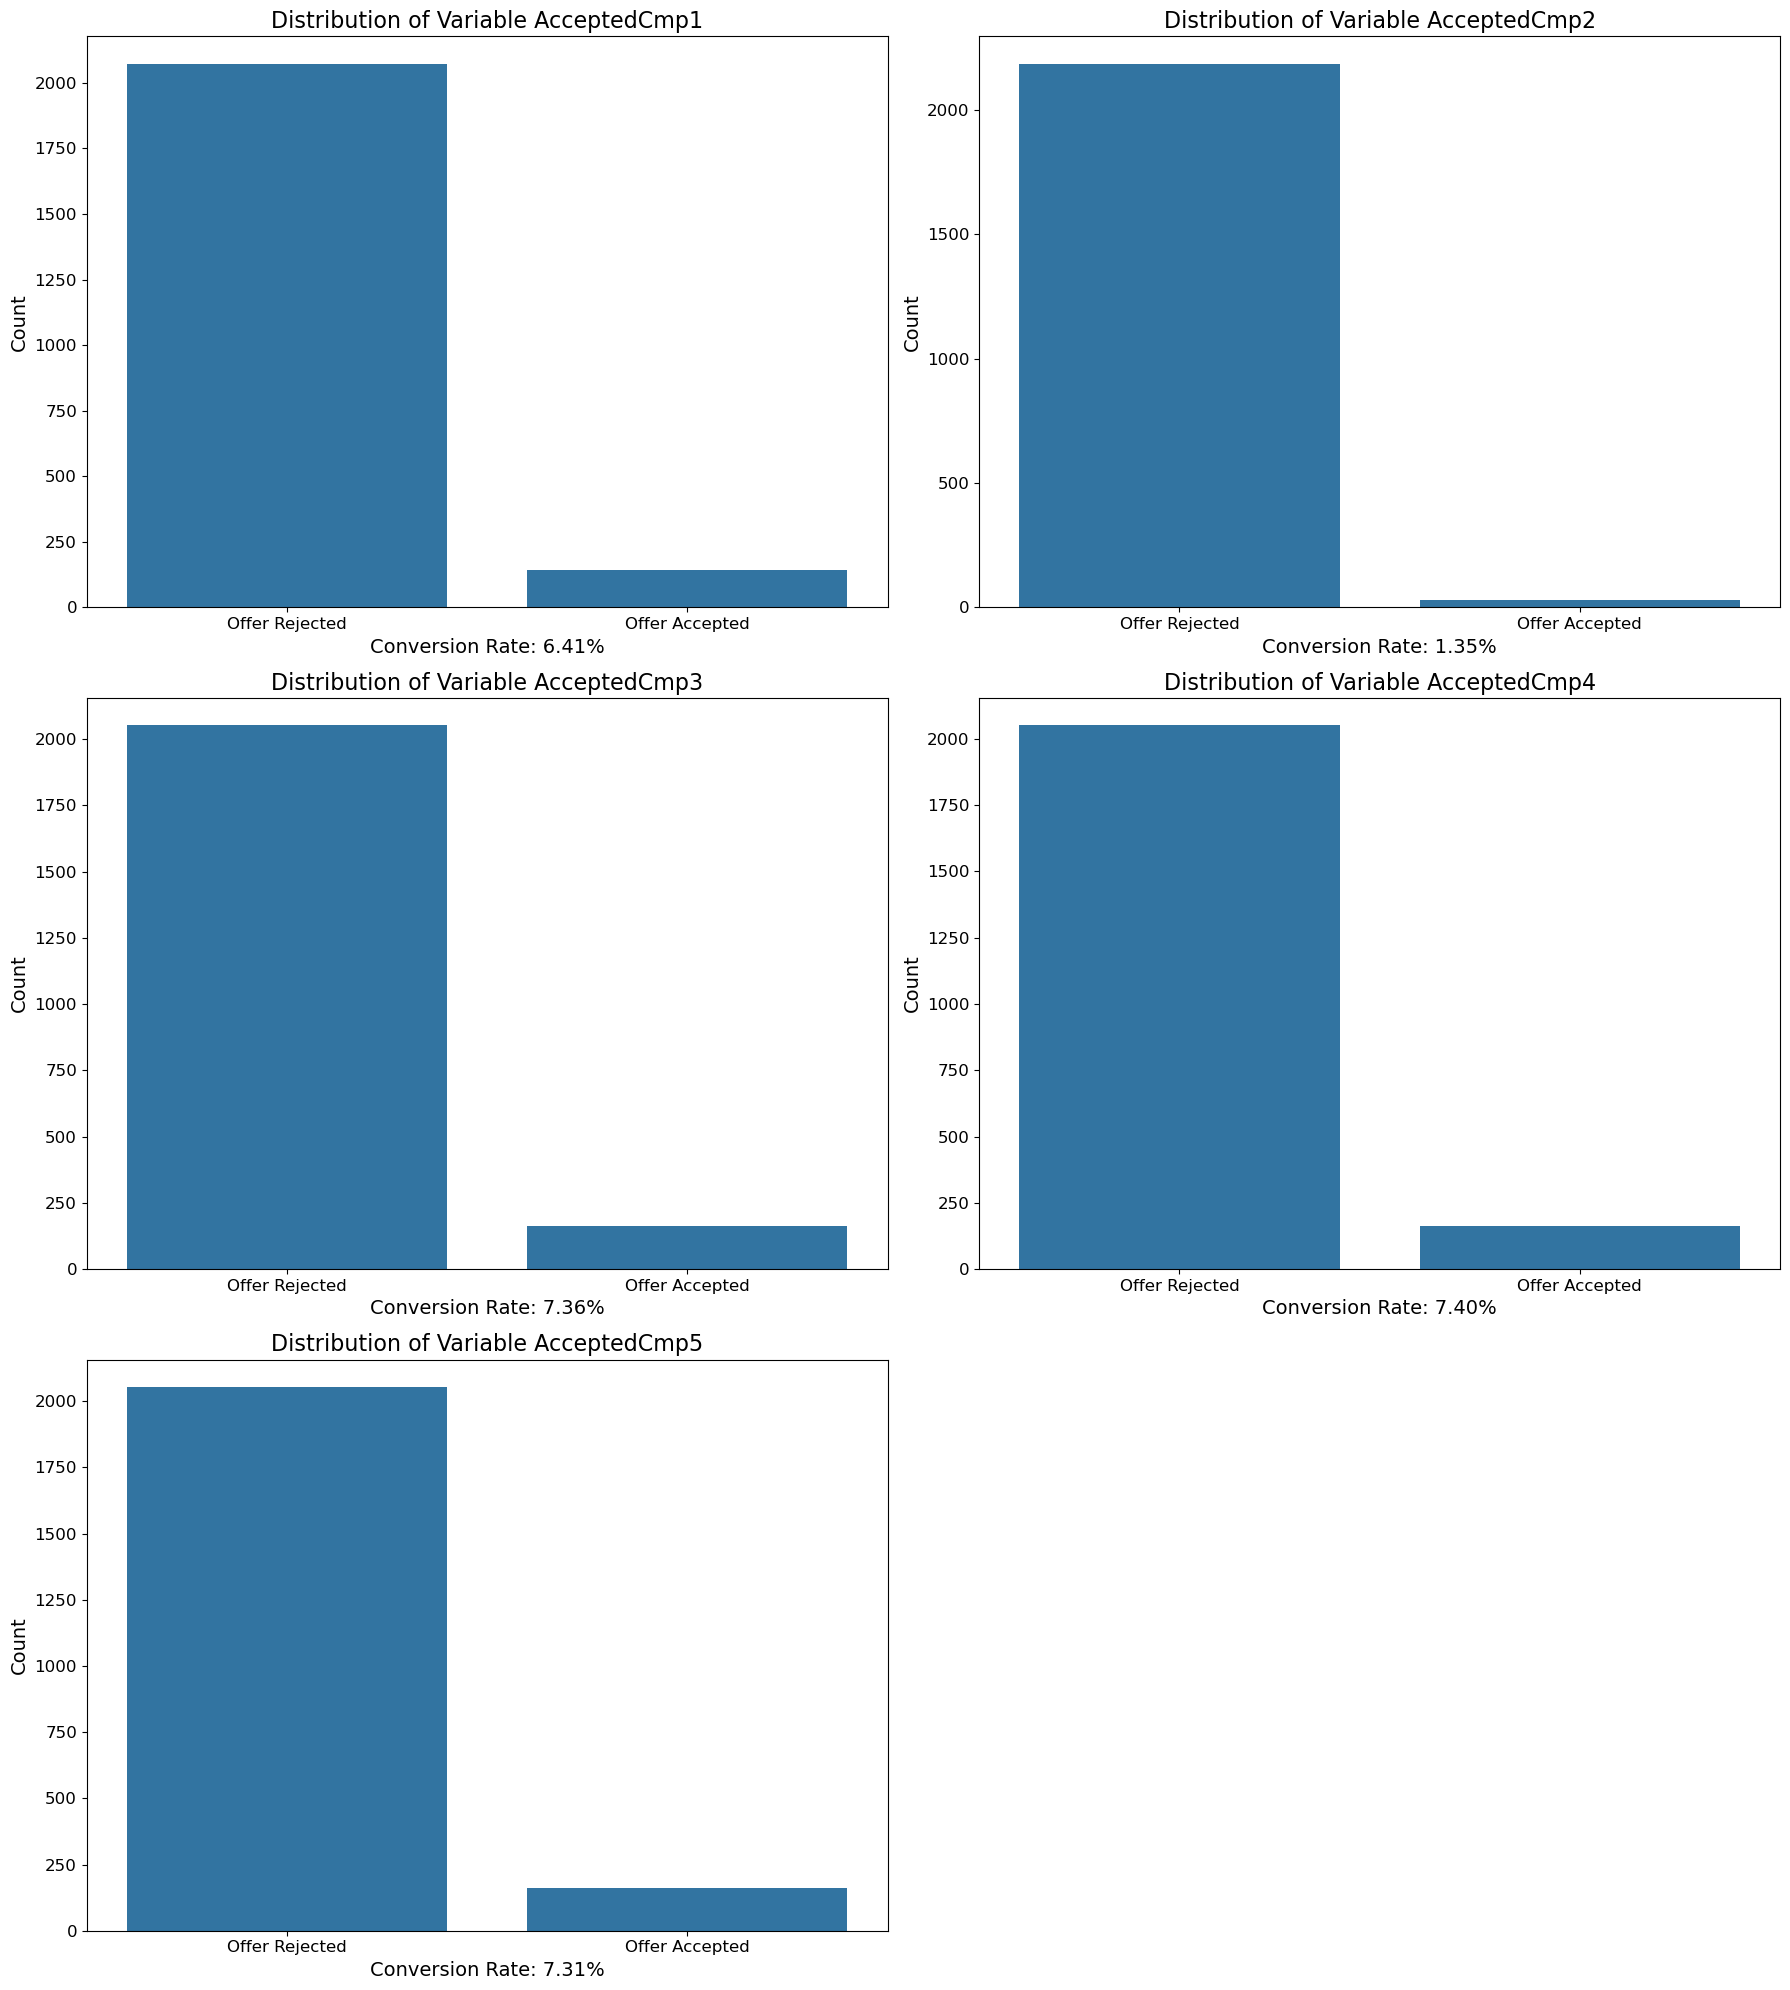

In [4]:
# 3. Count Plots for Categorical Features
plt.figure(figsize=(18, 20))
for i, feature in enumerate(["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5"], 1):
    # Get the count of each class in the target variable
    response_counts = data[feature].value_counts()
    conversion_rate = (response_counts[1] / response_counts.sum()) * 100
    plt.subplot(3, 2, i)
    sns.countplot(x=feature, data=data,)
    plt.title(f'Distribution of Variable {feature}', fontsize=16)
    plt.xlabel(f"Conversion Rate: {conversion_rate:.2f}%", fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(ticks=[0, 1], labels=['Offer Rejected', 'Offer Accepted'], fontsize=12)
    plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [5]:
# Infer data types
numerical_cols = data.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = data.select_dtypes(include=["object"]).columns.tolist()

# Remove binary columns from numerical and categorical lists
numerical_features = [col for col in numerical_cols if data[col].nunique() > 5]
categorical_features = categorical_cols + [col for col in numerical_cols if data[col].nunique() <= 5 and col != 'Response']

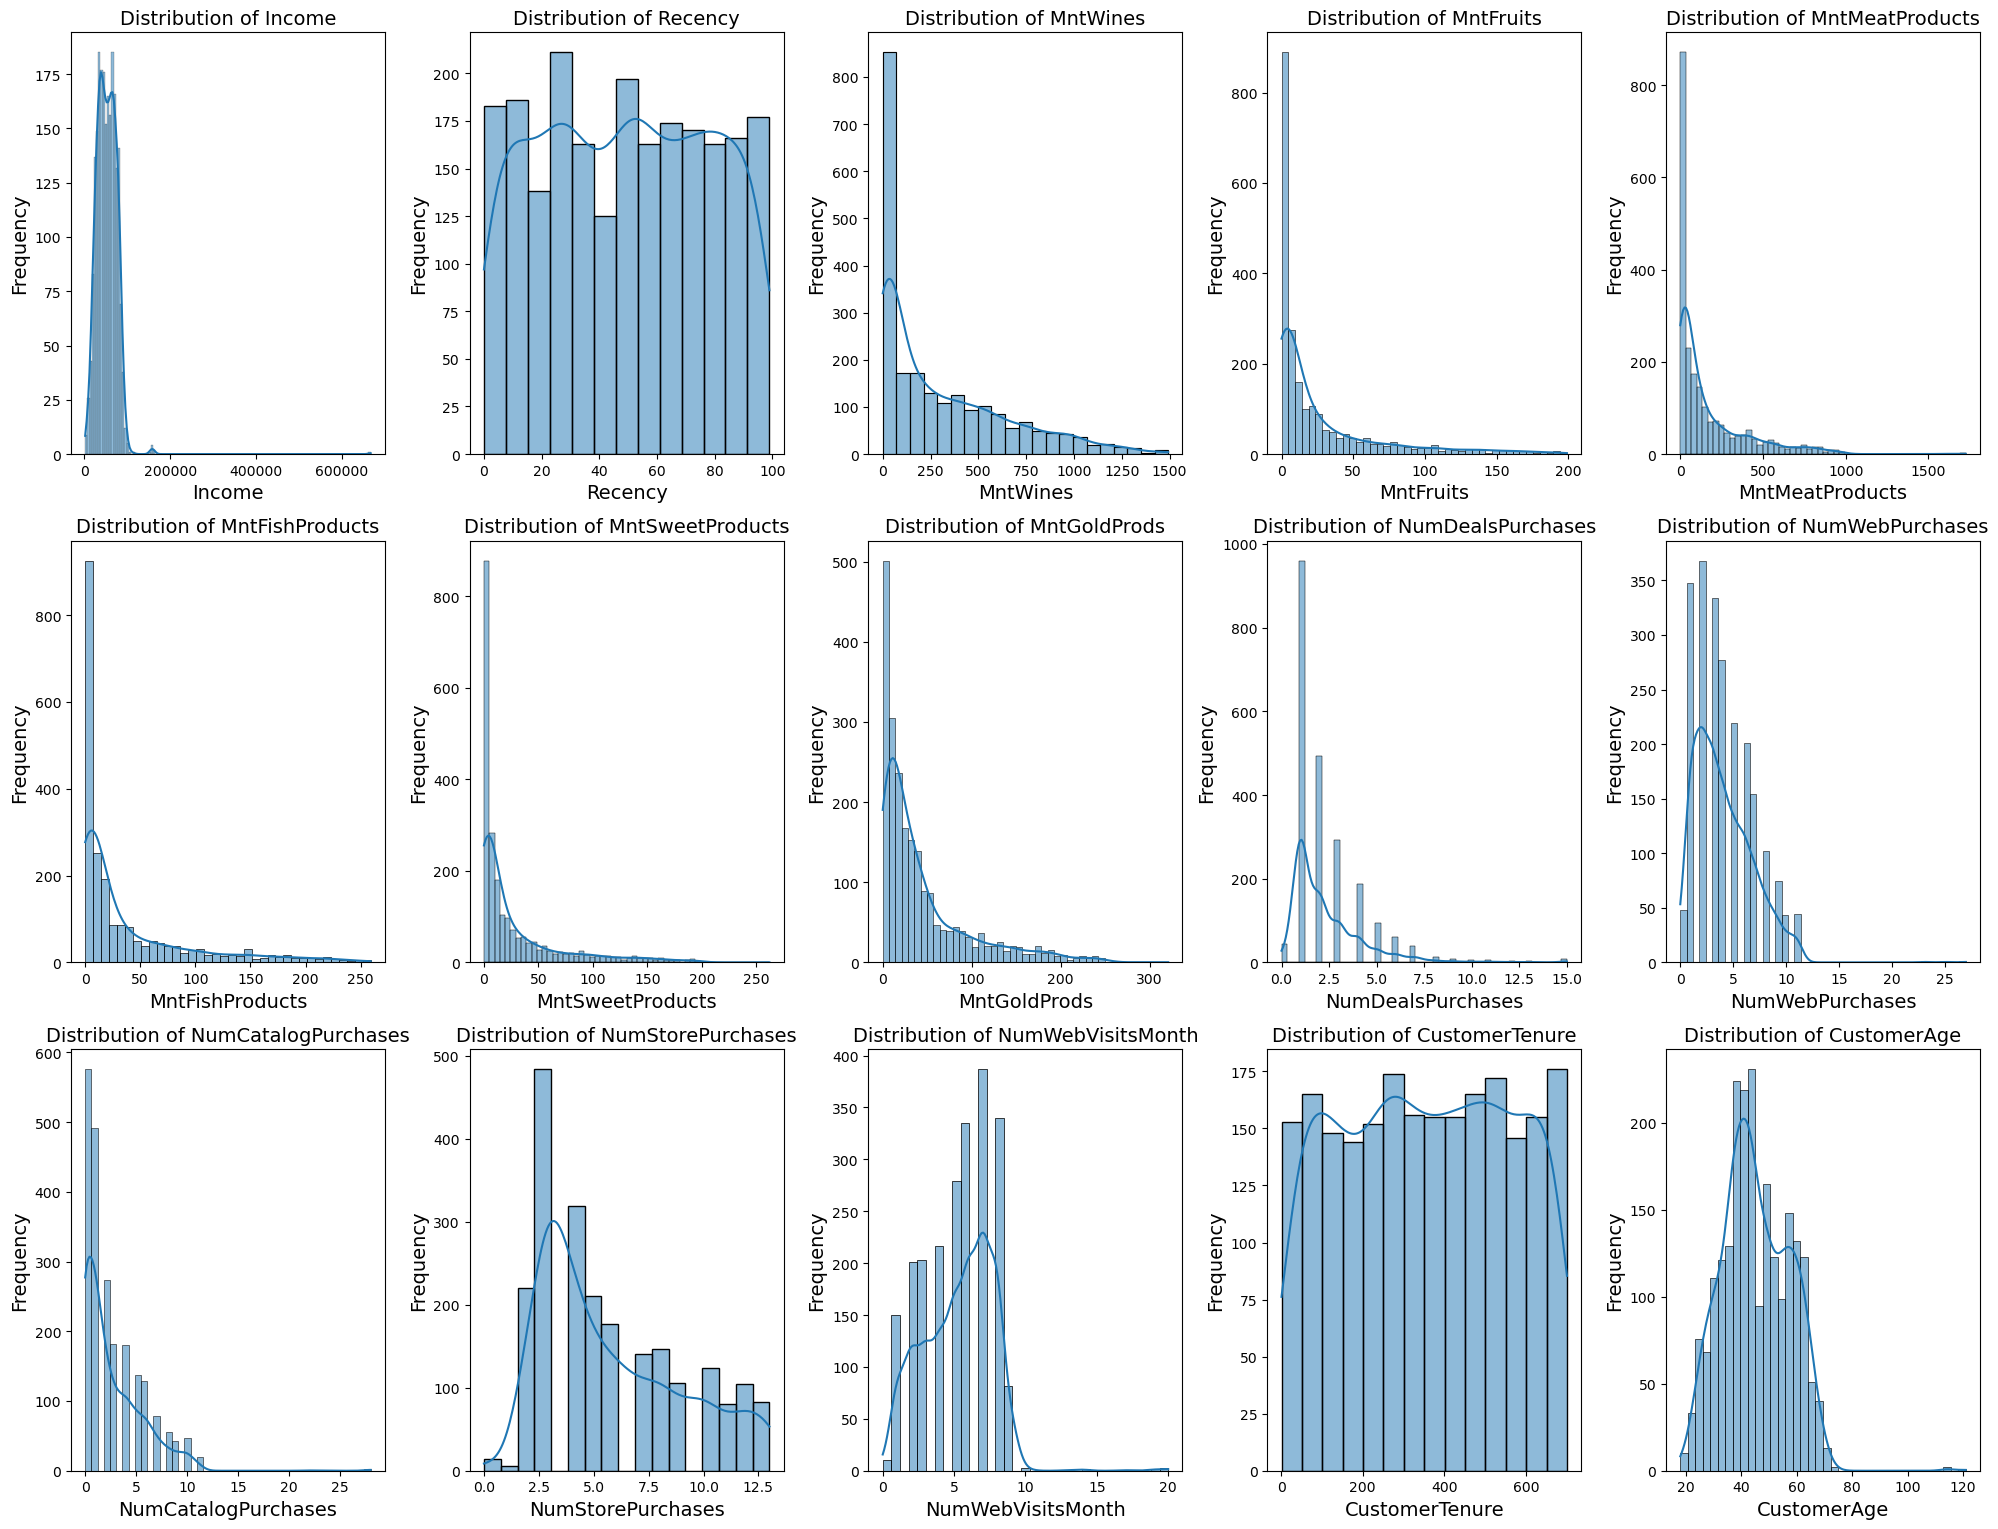

In [6]:
plt.figure(figsize=(20, 20))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 5, i)
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}', fontsize=14)
    plt.xlabel(feature, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
plt.tight_layout()
plt.show()

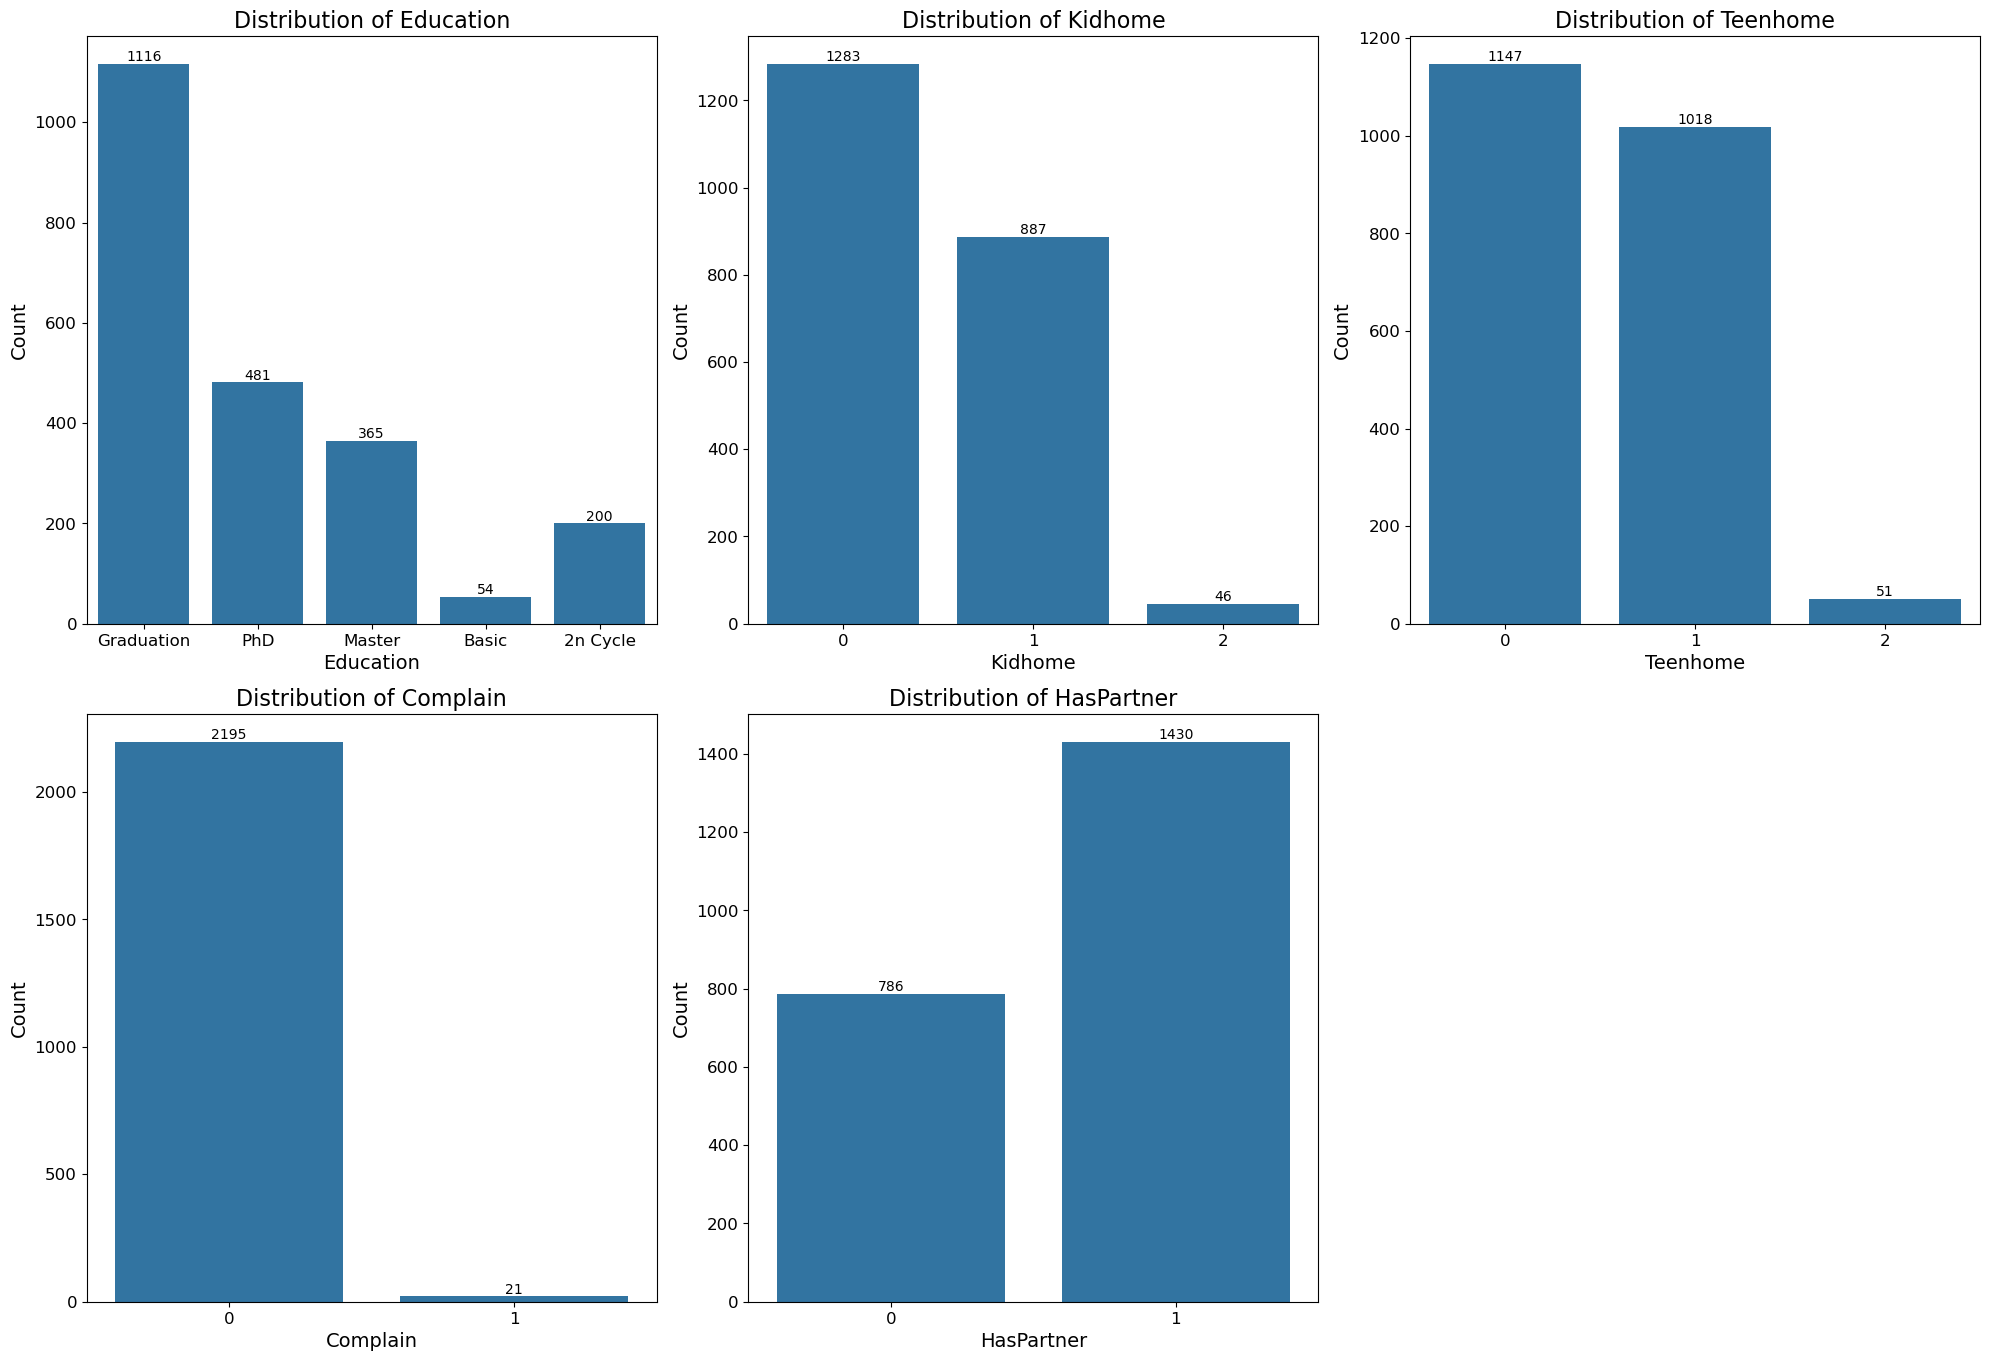

In [7]:
# Remove specified features from the list
filtered_features = [feature for feature in categorical_features if feature not in ["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5"]]

# 3. Count Plots for Categorical Features
plt.figure(figsize=(20, 20))
for i, feature in enumerate(filtered_features, 1):
    plt.subplot(3, 3, i)
    ax = sns.countplot(x=feature, data=data)
    plt.title(f'Distribution of {feature}', fontsize=16)
    plt.xlabel(feature, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    # Add data labels
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=10)
        
plt.tight_layout()
plt.show()

C:\Users\janbi\AppData\Local\Temp\ipykernel_56036\2687149244.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(x='Response', y=feature, data=data, palette=['#c44e52', '#55a868'])
C:\Users\janbi\AppData\Local\Temp\ipykernel_56036\2687149244.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(x='Response', y=feature, data=data, palette=['#c44e52', '#55a868'])
C:\Users\janbi\AppData\Local\Temp\ipykernel_56036\2687149244.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(x='Response', y=feature, data=data, palette=['#c

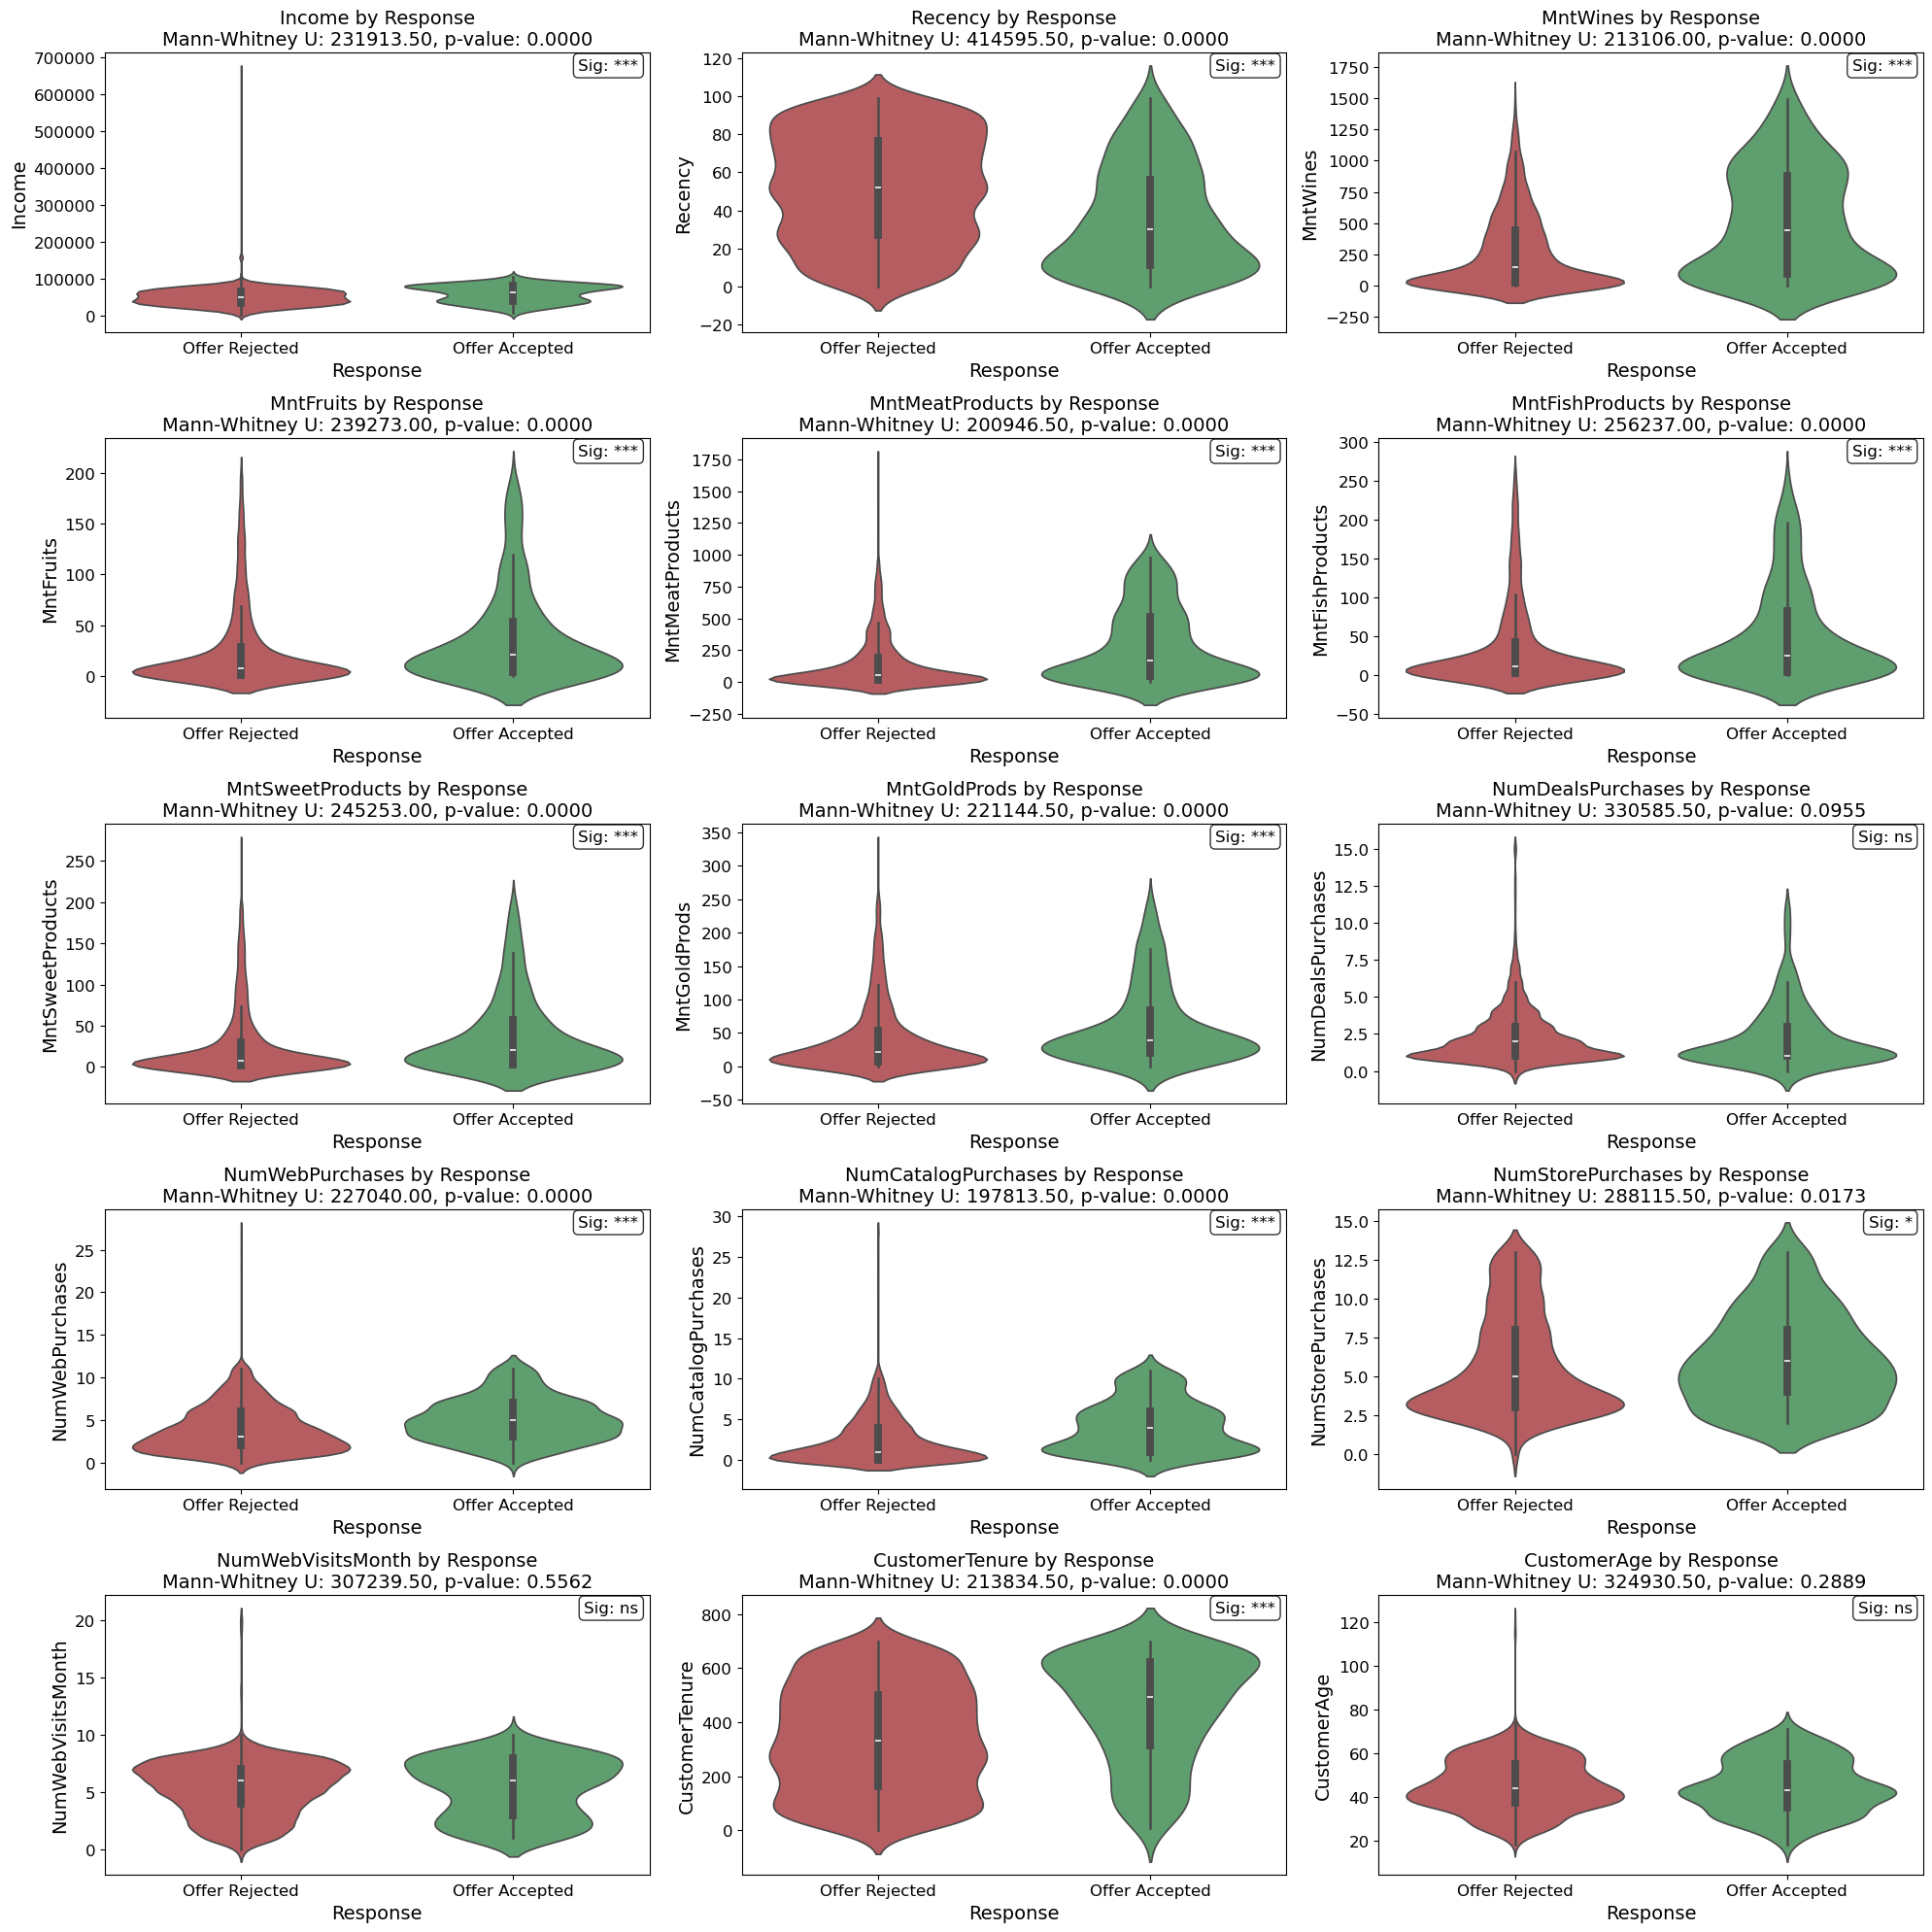

In [20]:
# 4. Violin Plots to Show Distribution of Numerical Features by "Response" with Statistical Testing
plt.figure(figsize=(20, 20))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(5, 3, i)
    
    # Create the violin plot
    ax = sns.violinplot(x='Response', y=feature, data=data, palette=['#c44e52', '#55a868'])
    
    # Perform Mann-Whitney U test (Wilcoxon rank-sum test)
    group_0 = data[data['Response'] == 0][feature].dropna()
    group_1 = data[data['Response'] == 1][feature].dropna()
    
    # Calculate test statistic and p-value
    statistic, p_value = stats.mannwhitneyu(group_0, group_1, alternative='two-sided')
    
    # Add statistical test results to the plot
    plt.title(f'{feature} by Response\nMann-Whitney U: {statistic:.2f}, p-value: {p_value:.4f}', fontsize=14)
    plt.xlabel('Response', fontsize=14)
    plt.ylabel(feature, fontsize=14)
    plt.xticks(ticks=[0, 1], labels=['Offer Rejected', 'Offer Accepted'], fontsize=12)
    plt.yticks(fontsize=12)
    
    # Add significance annotation
    if p_value < 0.001:
        significance = "***"
    elif p_value < 0.01:
        significance = "**"
    elif p_value < 0.05:
        significance = "*"
    else:
        significance = "ns"
    
    # Add significance text in the top right corner of the plot
    ax.text(0.98, 0.98, f'Sig: {significance}', transform=ax.transAxes, 
            fontsize=12, verticalalignment='top', horizontalalignment='right',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

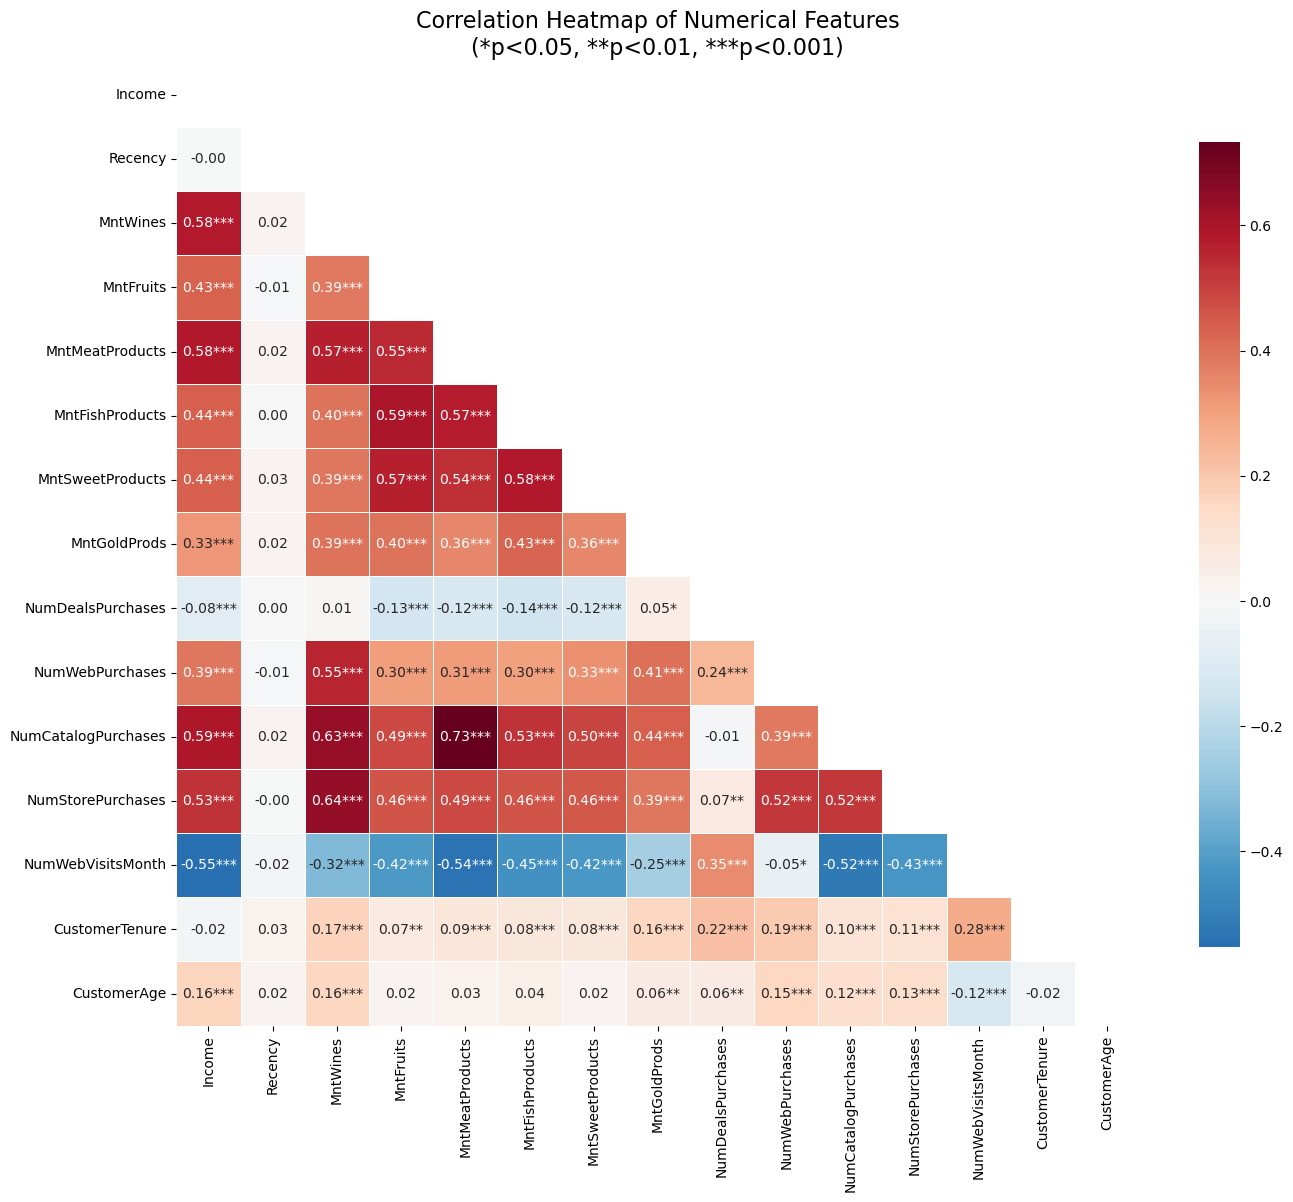


Summary of Significant Correlations (p < 0.05):
MntMeatProducts ↔ NumCatalogPurchases: r=0.734, p=0.0000
MntWines ↔ NumStorePurchases: r=0.640, p=0.0000
MntWines ↔ NumCatalogPurchases: r=0.635, p=0.0000
MntFruits ↔ MntFishProducts: r=0.593, p=0.0000
Income ↔ NumCatalogPurchases: r=0.589, p=0.0000
Income ↔ MntMeatProducts: r=0.585, p=0.0000
MntFishProducts ↔ MntSweetProducts: r=0.584, p=0.0000
Income ↔ MntWines: r=0.579, p=0.0000
MntMeatProducts ↔ MntFishProducts: r=0.574, p=0.0000
MntFruits ↔ MntSweetProducts: r=0.572, p=0.0000
MntWines ↔ MntMeatProducts: r=0.569, p=0.0000
MntWines ↔ NumWebPurchases: r=0.554, p=0.0000
Income ↔ NumWebVisitsMonth: r=-0.553, p=0.0000
MntFruits ↔ MntMeatProducts: r=0.548, p=0.0000
MntMeatProducts ↔ NumWebVisitsMonth: r=-0.539, p=0.0000
MntMeatProducts ↔ MntSweetProducts: r=0.535, p=0.0000
MntFishProducts ↔ NumCatalogPurchases: r=0.533, p=0.0000
Income ↔ NumStorePurchases: r=0.529, p=0.0000
NumCatalogPurchases ↔ NumWebVisitsMonth: r=-0.522, p=0.0000
NumCat

In [16]:
# 5. Correlation Heatmap of Numerical Features with Statistical Significance
def correlation_significance_matrix(df):
    """Calculate correlation matrix with p-values"""
    n_features = len(df.columns)
    corr_matrix = np.zeros((n_features, n_features))
    p_value_matrix = np.zeros((n_features, n_features))
    
    for i in range(n_features):
        for j in range(n_features):
            if i == j:
                corr_matrix[i, j] = 1.0
                p_value_matrix[i, j] = 0.0
            else:
                # Calculate Pearson correlation and p-value
                corr_coef, p_val = stats.pearsonr(df.iloc[:, i].dropna(), df.iloc[:, j].dropna())
                corr_matrix[i, j] = corr_coef
                p_value_matrix[i, j] = p_val
    
    return corr_matrix, p_value_matrix

# Calculate correlation matrix and p-values
corr_matrix, p_value_matrix = correlation_significance_matrix(data[numerical_features])

# Create DataFrame for easier handling
corr_df = pd.DataFrame(corr_matrix, index=numerical_features, columns=numerical_features)
p_value_df = pd.DataFrame(p_value_matrix, index=numerical_features, columns=numerical_features)

# Create annotation matrix with correlation values and significance indicators
annotations = np.empty_like(corr_matrix, dtype=object)
for i in range(corr_matrix.shape[0]):
    for j in range(corr_matrix.shape[1]):
        corr_val = corr_matrix[i, j]
        p_val = p_value_matrix[i, j]
        
        # Add significance indicators
        if p_val < 0.001:
            sig_indicator = "***"
        elif p_val < 0.01:
            sig_indicator = "**"
        elif p_val < 0.05:
            sig_indicator = "*"
        else:
            sig_indicator = ""
        
        # Format annotation
        if i == j:  # Diagonal elements
            annotations[i, j] = f"{corr_val:.2f}"
        else:
            annotations[i, j] = f"{corr_val:.2f}{sig_indicator}"

# Create the heatmap
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(corr_df, dtype=bool))  # Mask upper triangle to avoid redundancy
sns.heatmap(corr_df, mask=mask, annot=annotations, fmt='', cmap='RdBu_r', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})

plt.title('Correlation Heatmap of Numerical Features\n'
          '(*p<0.05, **p<0.01, ***p<0.001)', fontsize=16)
plt.tight_layout()
plt.show()

# Print summary of significant correlations
print("\nSummary of Significant Correlations (p < 0.05):")
print("=" * 60)
significant_pairs = []
for i in range(len(numerical_features)):
    for j in range(i+1, len(numerical_features)):
        corr_val = corr_matrix[i, j]
        p_val = p_value_matrix[i, j]
        if p_val < 0.05:
            significant_pairs.append((numerical_features[i], numerical_features[j], corr_val, p_val))

# Sort by absolute correlation value (strongest first)
significant_pairs.sort(key=lambda x: abs(x[2]), reverse=True)

for feat1, feat2, corr, p_val in significant_pairs:
    print(f"{feat1} ↔ {feat2}: r={corr:.3f}, p={p_val:.4f}")

if not significant_pairs:
    print("No significant correlations found (p < 0.05)")

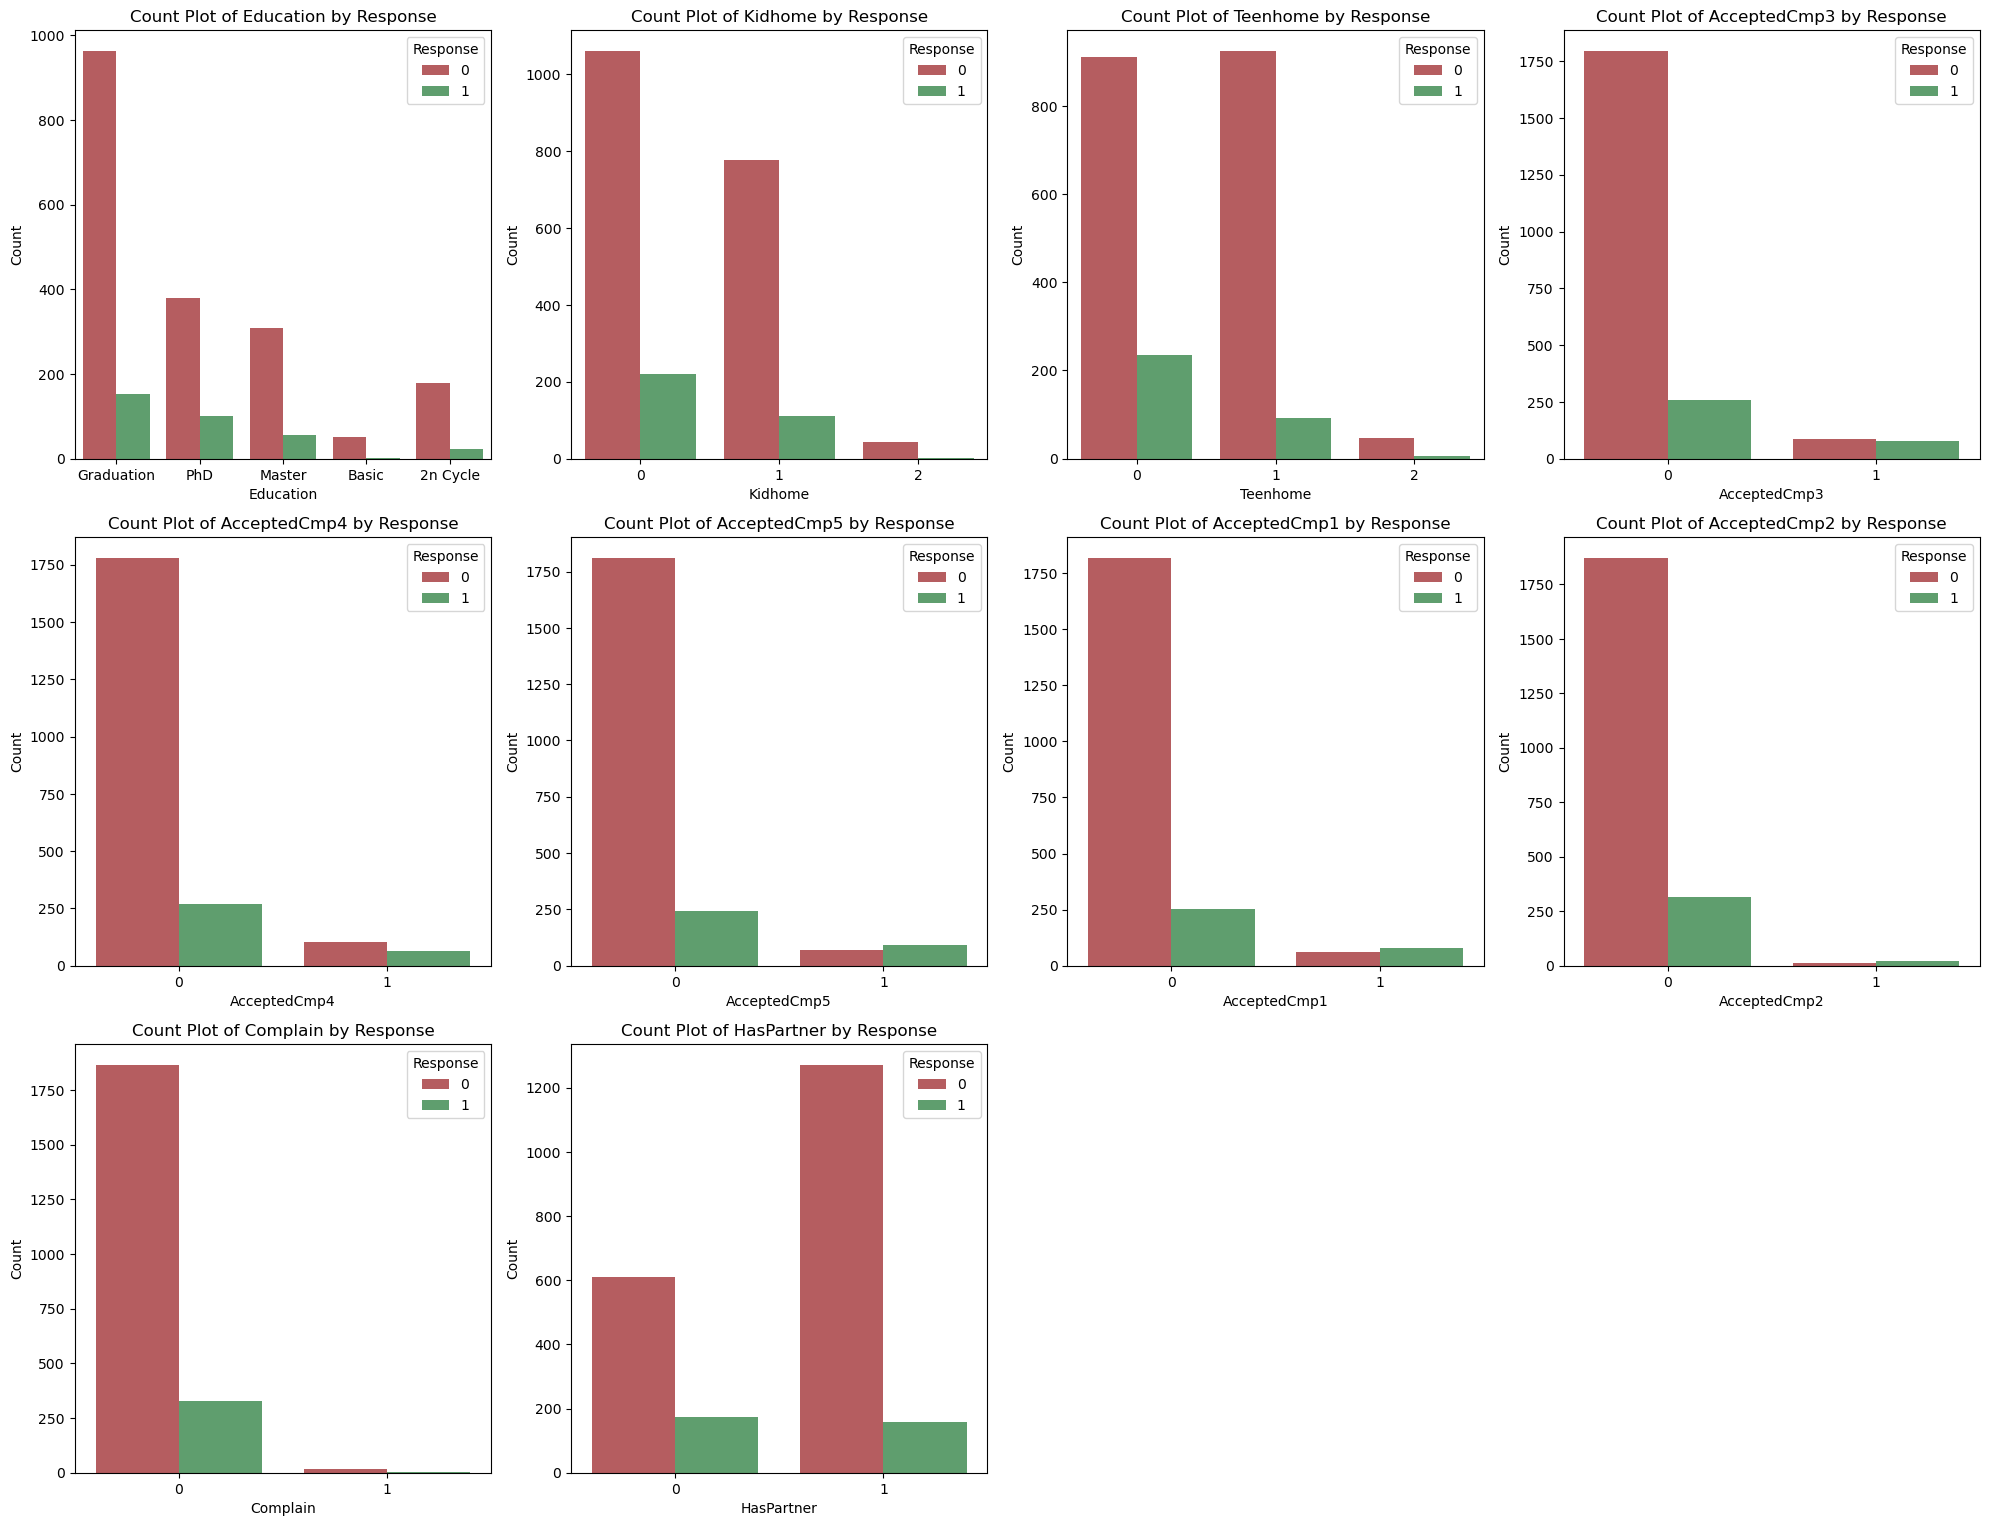

In [10]:
# 7. Count Plots for Categorical Features by "Response"
plt.figure(figsize=(20, 20))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(4, 4, i)
    sns.countplot(x=feature, data=data, hue='Response', palette=['#c44e52', '#55a868'])
    plt.title(f'Count Plot of {feature} by Response')
    plt.xlabel(feature)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

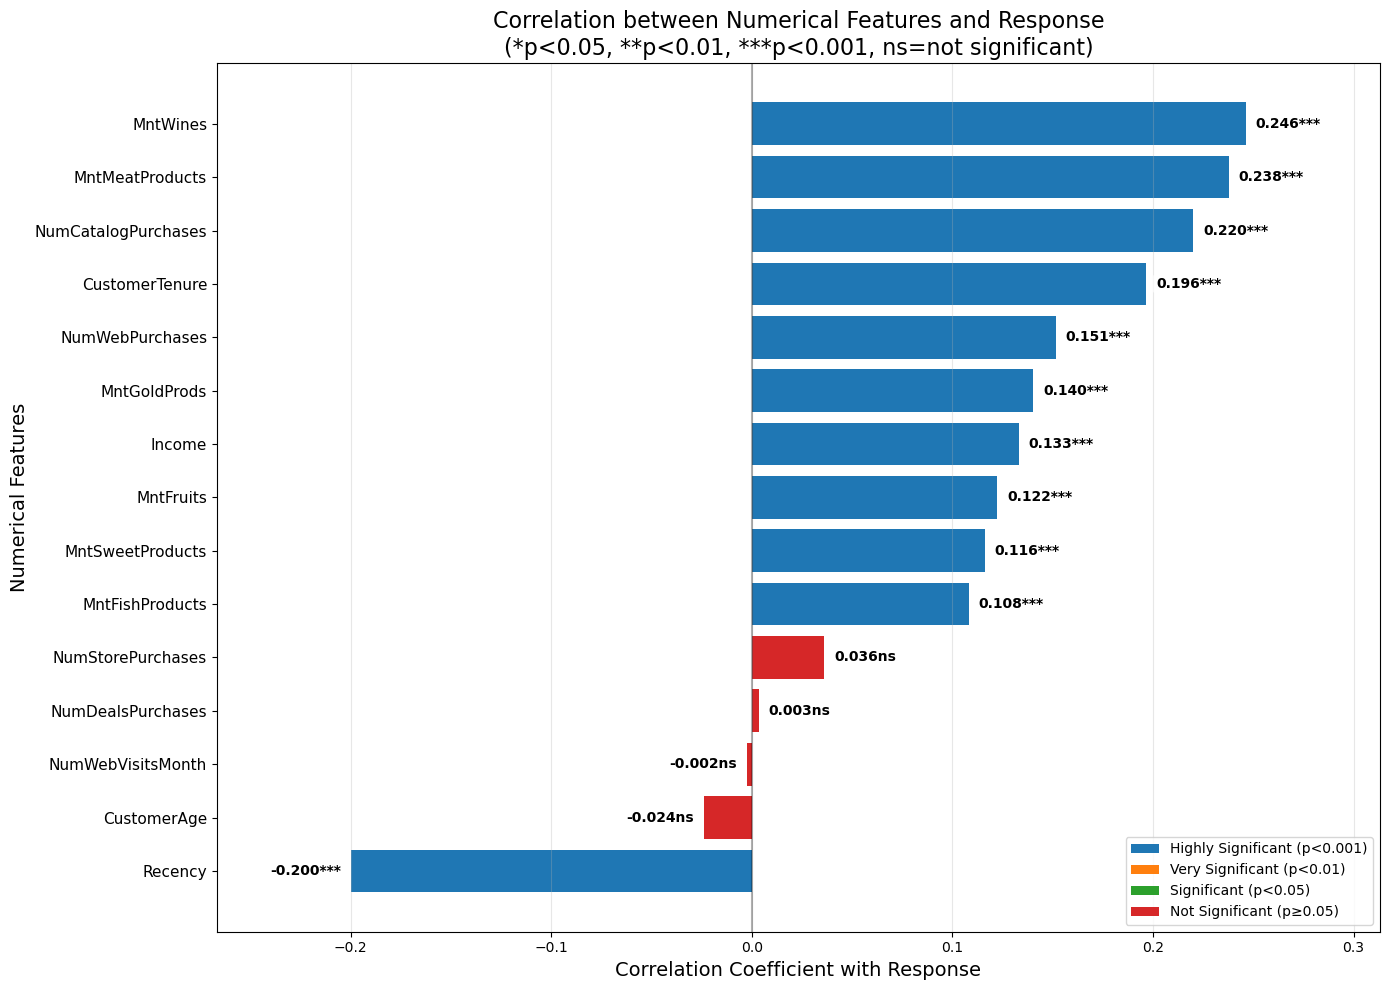


Detailed Summary of Correlations with Response:
MntWines        | r= 0.246 | p= 0.0000 | Highly Significant (***) | Weak Positive
MntMeatProducts | r= 0.238 | p= 0.0000 | Highly Significant (***) | Weak Positive
NumCatalogPurchases | r= 0.220 | p= 0.0000 | Highly Significant (***) | Weak Positive
Recency         | r=-0.200 | p= 0.0000 | Highly Significant (***) | Weak Negative
CustomerTenure  | r= 0.196 | p= 0.0000 | Highly Significant (***) | Weak Positive
NumWebPurchases | r= 0.151 | p= 0.0000 | Highly Significant (***) | Weak Positive
MntGoldProds    | r= 0.140 | p= 0.0000 | Highly Significant (***) | Weak Positive
Income          | r= 0.133 | p= 0.0000 | Highly Significant (***) | Weak Positive
MntFruits       | r= 0.122 | p= 0.0000 | Highly Significant (***) | Weak Positive
MntSweetProducts | r= 0.116 | p= 0.0000 | Highly Significant (***) | Weak Positive
MntFishProducts | r= 0.108 | p= 0.0000 | Highly Significant (***) | Weak Positive
NumStorePurchases | r= 0.036 | p= 0.0881 | N

In [21]:
# 8. Plot of correlation factor between numerical features and response with Statistical Significance
# Calculate correlations and p-values with Response
correlations_with_response = []
p_values_with_response = []
feature_names = []

for feature in numerical_features:
    # Calculate Pearson correlation and p-value
    corr_coef, p_val = stats.pearsonr(data[feature].dropna(), 
                                      data.loc[data[feature].notna(), 'Response'])
    correlations_with_response.append(corr_coef)
    p_values_with_response.append(p_val)
    feature_names.append(feature)

# Create DataFrame for easier handling
corr_data = pd.DataFrame({
    'Feature': feature_names,
    'Correlation': correlations_with_response,
    'P_value': p_values_with_response
})

# Sort by correlation coefficient (not absolute value) - highest positive first, then negative
corr_data = corr_data.sort_values('Correlation', ascending=True)

# Create color mapping based on significance
colors = []
significance_labels = []
for p_val in corr_data['P_value']:
    if p_val < 0.001:
        colors.append('#1f77b4')  # Strong blue for highly significant
        significance_labels.append('***')
    elif p_val < 0.01:
        colors.append('#ff7f0e')  # Orange for very significant
        significance_labels.append('**')
    elif p_val < 0.05:
        colors.append('#2ca02c')  # Green for significant
        significance_labels.append('*')
    else:
        colors.append('#d62728')  # Red for not significant
        significance_labels.append('ns')

# Create the plot
plt.figure(figsize=(14, 10))
bars = plt.barh(range(len(corr_data)), corr_data['Correlation'], color=colors)

# Add correlation values and significance indicators on the bars
for i, (idx, row) in enumerate(corr_data.iterrows()):
    corr_val = row['Correlation']
    sig_label = significance_labels[i]
    
    # Simple positioning: just add a small margin to the end of each bar
    margin = 0.005  # Small fixed margin
    
    if corr_val >= 0:
        # For positive correlations, place text to the right of the bar
        x_pos = corr_val + margin
        ha = 'left'
    else:
        # For negative correlations, place text to the left of the bar
        x_pos = corr_val - margin
        ha = 'right'
    
    plt.text(x_pos, i, f'{corr_val:.3f}{sig_label}', 
             ha=ha, va='center', fontsize=10, fontweight='bold',
             bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.8, edgecolor='none'))

# Customize the plot
plt.yticks(range(len(corr_data)), corr_data['Feature'], fontsize=11)
plt.xlabel('Correlation Coefficient with Response', fontsize=14)
plt.ylabel('Numerical Features', fontsize=14)
plt.title('Correlation between Numerical Features and Response\n'
          '(*p<0.05, **p<0.01, ***p<0.001, ns=not significant)', fontsize=16)

# Add vertical line at x=0
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)

# Add grid for better readability
plt.grid(True, axis='x', alpha=0.3)

# Adjust x-axis limits to provide more space for labels
x_min, x_max = corr_data['Correlation'].min(), corr_data['Correlation'].max()
x_range_actual = x_max - x_min
padding = x_range_actual * 0.15  # 15% padding on each side
plt.xlim(x_min - padding, x_max + padding)

# Create custom legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#1f77b4', label='Highly Significant (p<0.001)'),
    Patch(facecolor='#ff7f0e', label='Very Significant (p<0.01)'),
    Patch(facecolor='#2ca02c', label='Significant (p<0.05)'),
    Patch(facecolor='#d62728', label='Not Significant (p≥0.05)')
]
plt.legend(handles=legend_elements, loc='lower right', fontsize=10)

plt.tight_layout()
plt.show()

# Print detailed summary
print("\nDetailed Summary of Correlations with Response:")
print("=" * 70)
corr_summary = corr_data.copy()
corr_summary['Abs_Correlation'] = abs(corr_summary['Correlation'])
corr_summary = corr_summary.sort_values('Abs_Correlation', ascending=False)
for _, row in corr_summary.iterrows():
    feature = row['Feature']
    corr = row['Correlation']
    p_val = row['P_value']
    
    if p_val < 0.001:
        sig_text = "Highly Significant (***)"
    elif p_val < 0.01:
        sig_text = "Very Significant (**)"
    elif p_val < 0.05:
        sig_text = "Significant (*)"
    else:
        sig_text = "Not Significant (ns)"
    
    direction = "Positive" if corr > 0 else "Negative"
    strength = "Strong" if abs(corr) > 0.5 else "Moderate" if abs(corr) > 0.3 else "Weak"
    
    print(f"{feature:15} | r={corr:6.3f} | p={p_val:7.4f} | {sig_text:20} | {strength} {direction}")

print(f"\nSignificant correlations (p < 0.05): {sum(corr_data['P_value'] < 0.05)}/{len(corr_data)}")